In [54]:
%cd /
from google.colab import drive
drive.mount('/content/gdrive')

!ln -s /content/gdrive/My\ Drive/ ./mydrive
!ls mydrive

/
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
ln: failed to create symbolic link './mydrive/My Drive': File exists
'Colab Notebooks'		     'pliki do zajęć'
'Materiały z Zajęć(Obrazy Cyfrowe)'   PrawaStudentaUPe05102021.pdf
'MATURA(POLSKI)'		     'Zdjęcia(Moje)'
'My Drive'			      Zdjęcia.rar


In [55]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
import skimage,imutils

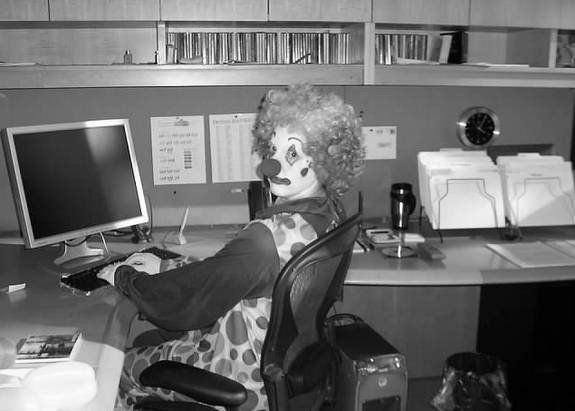

In [70]:
img = cv2.imread('/mydrive/Zdjęcia(Moje)/me.png')
img2 = cv2.imread('/mydrive/Zdjęcia(Moje)/sadge.jpg')

img_g = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


cv2_imshow(img_g)

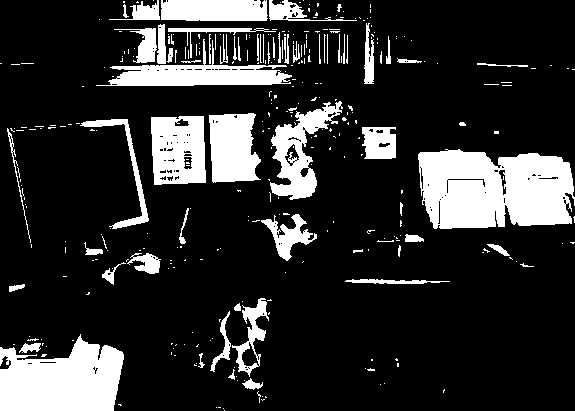

In [57]:
res, thresh = cv2.threshold(img_g, 170, 255, cv2.THRESH_BINARY)

cv2_imshow(thresh)

117.0


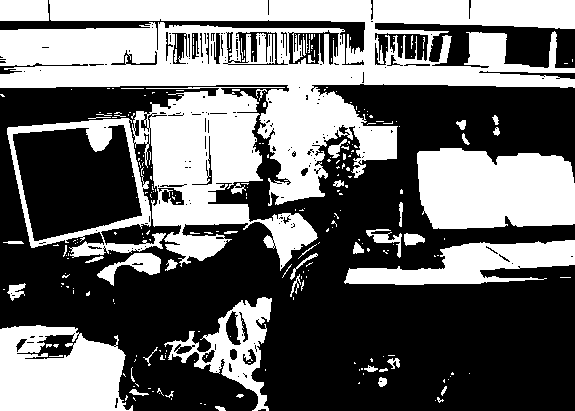

In [58]:
res, thresh = cv2.threshold(img_g, 0, 255, cv2.THRESH_OTSU)
print(res)

cv2_imshow(thresh)

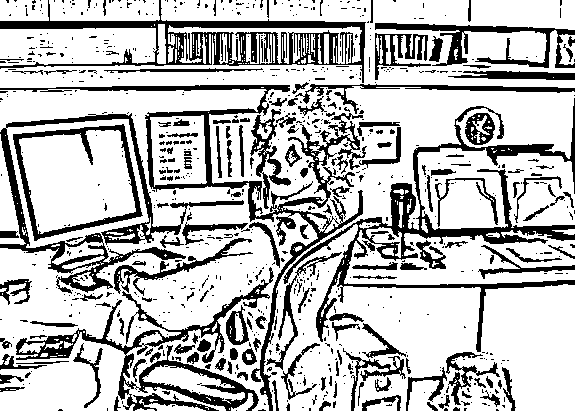

In [59]:
thresh3 = cv2.adaptiveThreshold(img_g, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 5)

cv2_imshow(thresh3)

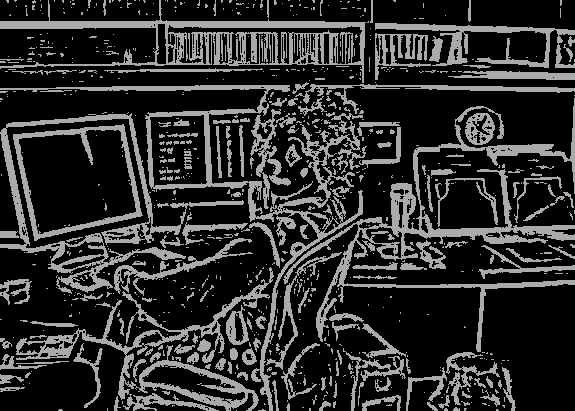

In [60]:
thresh4 = cv2.adaptiveThreshold(img_g, 170, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 5)

cv2_imshow(thresh4)

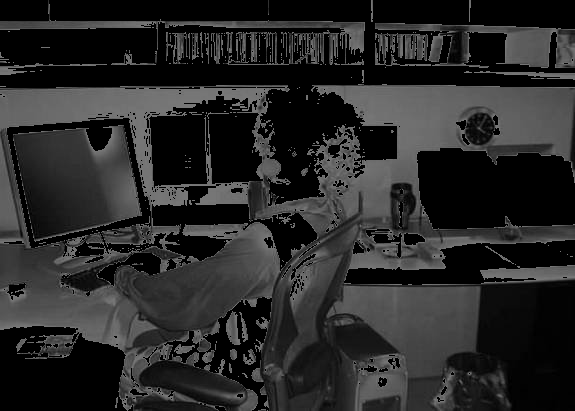

In [61]:
res, thresh = cv2.threshold(img_g, 120, 255, cv2.THRESH_TOZERO_INV)

cv2_imshow(thresh)

(427, 482, 3)
(411, 575, 3)
(411, 575)


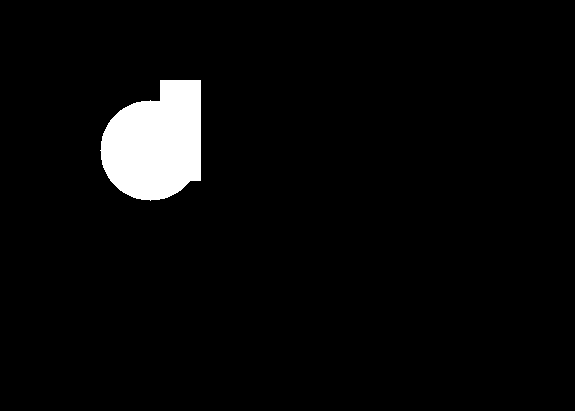

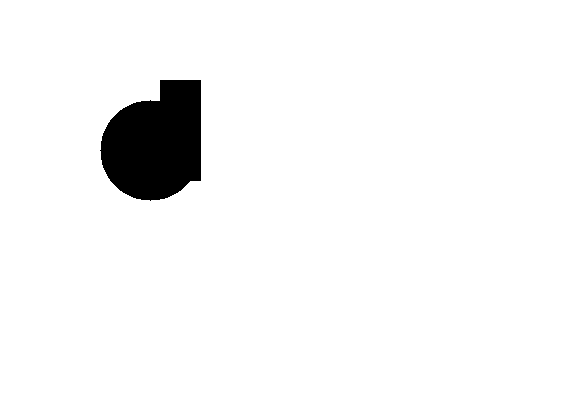

In [74]:


import numpy as np

print(img2.shape)
print(img.shape)

size  = (575,411)
img2_s = cv2.resize(img2,size)

rows, cols = img.shape[:2]
mask_figure = np.zeros((rows,cols), dtype=np.uint8)
print(mask_figure.shape)

cv2.circle(mask_figure, (150, 150), 50, 255, -1)
cv2.rectangle(mask_figure, (160, 80), (200, 180), 255, -1)

mask_figure_inv = cv2.bitwise_not(mask_figure)

cv2_imshow(mask_figure)
cv2_imshow(mask_figure_inv)

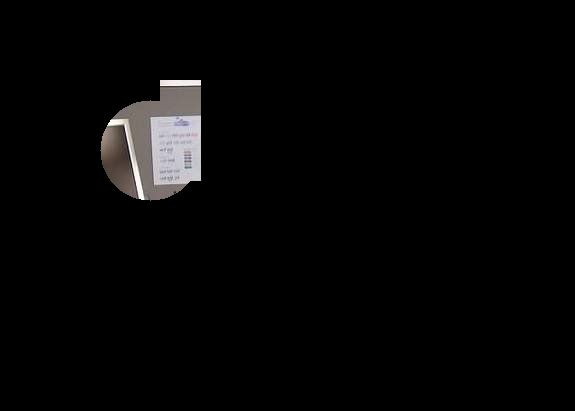

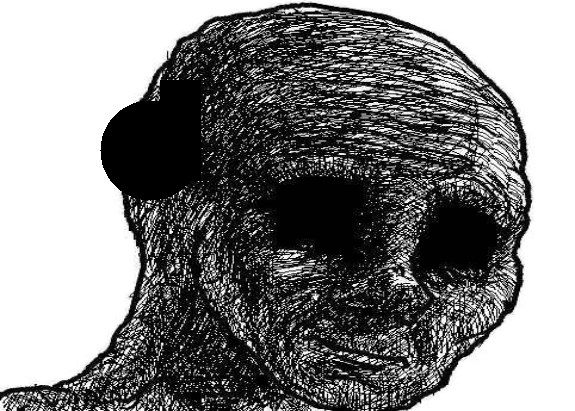

In [76]:
img_temp = cv2.bitwise_and(img,img, mask=mask_figure)
img2_temp = cv2.bitwise_and(img2_s,img2_s, mask=mask_figure_inv)


cv2_imshow(img_temp)

cv2_imshow(img2_temp)

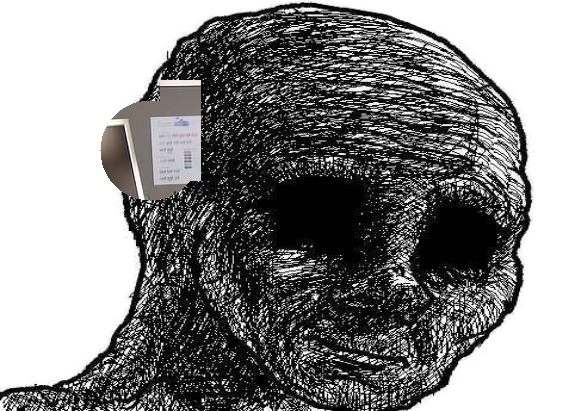

In [77]:
img_add = cv2.add(img_temp,img2_temp)

cv2_imshow(img_add)

(290, 367, 3)
(290, 367, 3)
(290, 367, 3)


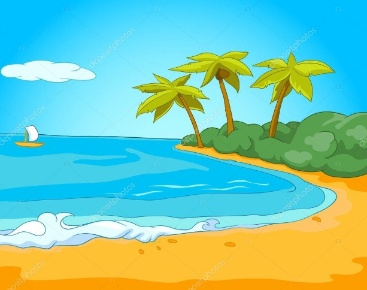

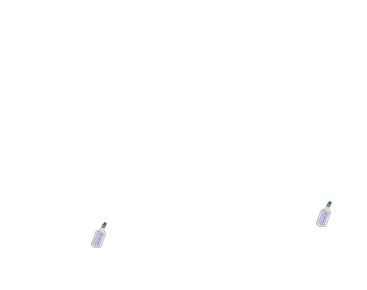

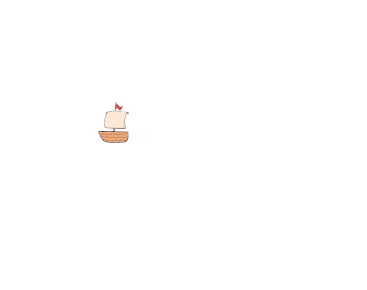

In [82]:
imgP = cv2.imread('/mydrive/pliki_zajęć/plaza.jpg')
imgB = cv2.imread('/mydrive/pliki_zajęć/butelki.jpg')
imgS = cv2.imread('/mydrive/pliki_zajęć/statek.jpg')


print(imgP.shape)
print(imgB.shape)
print(imgS.shape)


img_add2 = cv2.add(imgP,imgB)
img_add3 = cv2.add(img_add2,imgS)

cv2_imshow(imgP)
cv2_imshow(imgB)
cv2_imshow(imgS)

(290, 367)


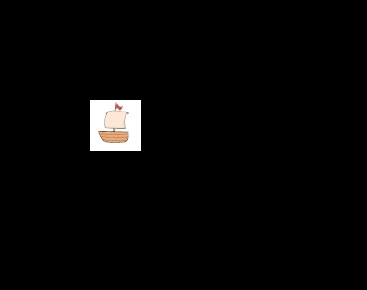

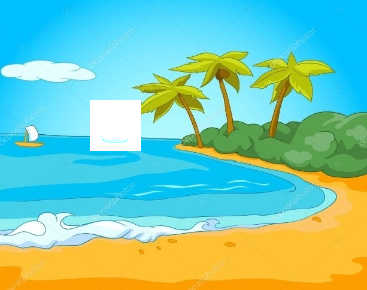

In [110]:
rows, cols = imgS.shape[:2]

mask_statek = np.zeros((rows,cols), dtype=np.uint8)

print(mask_statek.shape)

cv2.rectangle(mask_statek, (90, 100), (140, 150), 255, -1)


img_statek = cv2.bitwise_and(imgS,imgS, mask=mask_statek)

cv2_imshow(img_statek)


img_addS = cv2.add(imgP,img_statek)

cv2_imshow(img_addS)